In [37]:
import cdflib
import numpy as np
import pandas as pd

path = 'ac_h2_mfi_19970902_v04.cdf'
f = cdflib.CDF(path)
# print(f.cdf_info())
# print(type(f.cdf_info()))
variable_names = f.cdf_info().rVariables
print(variable_names)
variable_name =  'Magnitude'
data_variable = f.varget('Magnitude')
s = pd.Series(data_variable, name='Magnitude')
# f.close()
display(s)
s.mean()

['Epoch', 'Time_PB5', 'Magnitude', 'BGSEc', 'label_BGSE', 'BGSM', 'label_bgsm', 'Q_FLAG', 'SC_pos_GSE', 'label_pos_GSE', 'SC_pos_GSM', 'label_pos_GSM', 'unit_time', 'label_time', 'format_time', 'cartesian']


0     2.658
1     3.701
2     3.935
3     5.533
4     5.174
5     4.254
6     3.873
7     3.348
8     3.123
9     3.324
10    3.319
11    2.815
12    2.853
13    2.777
14    2.656
15    2.906
16    3.118
17    3.115
18    2.877
19    2.879
20    2.833
21    3.052
22    5.905
23    7.879
Name: Magnitude, dtype: float32

3.6627915

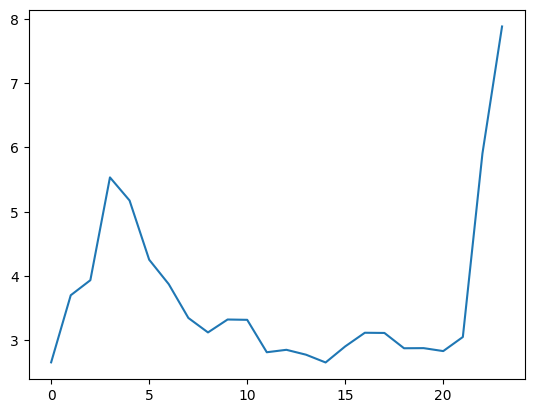

In [36]:
import matplotlib.pyplot as plt
plt.plot(s)

In [69]:
date_list = pd.date_range(start='2010-09-01', end='2023-08-20', freq='D')
date_list

DatetimeIndex(['2010-09-01', '2010-09-02', '2010-09-03', '2010-09-04',
               '2010-09-05', '2010-09-06', '2010-09-07', '2010-09-08',
               '2010-09-09', '2010-09-10',
               ...
               '2023-08-11', '2023-08-12', '2023-08-13', '2023-08-14',
               '2023-08-15', '2023-08-16', '2023-08-17', '2023-08-18',
               '2023-08-19', '2023-08-20'],
              dtype='datetime64[ns]', length=4737, freq='D')

In [70]:
magnetic_mag = {}

In [71]:
date_list[0].strftime('%Y')

'2010'

In [72]:
# import cdflib
# import numpy as np
# import pandas as pd

# path_base = 'C:/Users/User/Desktop/mag_data/spdf.gsfc.nasa.gov/pub/data/ace/mag/level_2_cdaweb/mfi_h2/'

# for date in date_list:
#     path = path_base + date.strftime('%Y') + '/ac_h2_mfi_' + date.strftime('%Y%m%d') + '_v05.cdf'
#     f = cdflib.CDF(path)
#     mag_mag = f.varget('Magnitude')
#     s = pd.Series(mag_mag, name='Magnitude')
#     magnetic_mag[date.strftime('%Y%m%d')] = s.mean()

In [73]:
# 2012-06-29 까지 v05
# 2018-01-29 까지 v06
# 2023-11-08 까지 v07

li1 = date_list[date_list <= '2012-06-29']
li2 = date_list[(date_list > '2012-06-29') & (date_list <= '2018-01-29')]
li3 = date_list[date_list > '2018-01-29']

In [74]:
print(li1[0], li1[-1])
print(li2[0], li2[-1])
print(li3[0], li3[-1])

2010-09-01 00:00:00 2012-06-29 00:00:00
2012-06-30 00:00:00 2018-01-29 00:00:00
2018-01-30 00:00:00 2023-08-20 00:00:00


In [76]:
import cdflib
import numpy as np
import pandas as pd

path_base = 'C:/Users/User/Desktop/mag_data/spdf.gsfc.nasa.gov/pub/data/ace/mag/level_2_cdaweb/mfi_h2/'

for date in li1:
    path = path_base + date.strftime('%Y') + '/ac_h2_mfi_' + date.strftime('%Y%m%d') + '_v05.cdf'
    f = cdflib.CDF(path)
    mag_mag = f.varget('Magnitude')
    s = pd.Series(mag_mag, name='Magnitude')
    magnetic_mag[date.strftime('%Y%m%d')] = s.mean()

for date in li2:
    path = path_base + date.strftime('%Y') + '/ac_h2_mfi_' + date.strftime('%Y%m%d') + '_v06.cdf'
    f = cdflib.CDF(path)
    mag_mag = f.varget('Magnitude')
    s = pd.Series(mag_mag, name='Magnitude')
    magnetic_mag[date.strftime('%Y%m%d')] = s.mean()
    
for date in li3:
    path = path_base + date.strftime('%Y') + '/ac_h2_mfi_' + date.strftime('%Y%m%d') + '_v07.cdf'
    f = cdflib.CDF(path)
    mag_mag = f.varget('Magnitude')
    s = pd.Series(mag_mag, name='Magnitude')
    magnetic_mag[date.strftime('%Y%m%d')] = s.mean()

In [77]:
ser = pd.Series(magnetic_mag.values())
ser = ser[(ser>-100)&(ser<100)]

In [78]:
magnetic_mag.values()

dict_values([7.345958, 6.3039584, 3.2355, 2.3474166, 3.9815834, 5.8508744, 6.0068755, 4.8380003, 4.7716665, 3.645542, 3.3569584, 3.7225835, 3.5415, 7.3706665, 6.777125, 7.926542, 4.4259167, 3.6030834, 2.3364582, 3.5687916, 4.344583, 3.615875, 8.393167, 6.012833, 3.0773752, 4.1902084, 5.6104584, 4.9880834, 3.5801666, 3.5353749, 3.29175, 2.68875, 3.264125, 3.5131671, 5.7151666, 5.596041, 3.5722084, -2.0833334e+30, 4.5365415, 3.9581249, 8.5715, 4.6254163, 3.197625, 1.8799583, 5.411375, 4.740875, 6.4919586, 4.6740417, 6.7568336, 5.1270833, 4.6175833, 6.1769586, 7.867417, 5.31275, 4.336042, 3.9436247, 3.5736248, 3.385833, 3.7527497, 4.1326666, 7.7387085, 8.276792, 4.7950416, 4.431417, 3.17375, 3.2635834, 2.2154582, 2.5588334, 5.836708, 4.4370837, 4.8245416, 9.010917, 5.001, 5.0852084, 6.846292, 4.6279583, 3.9941251, 5.1231246, 5.3142915, 4.2287917, 5.742083, 4.6426253, 6.0902085, 5.124208, 4.66425, 3.5476253, 3.8522918, 6.6668334, 6.931208, 4.4595833, 3.6263752, 3.3629582, 2.4832084, 2.4191

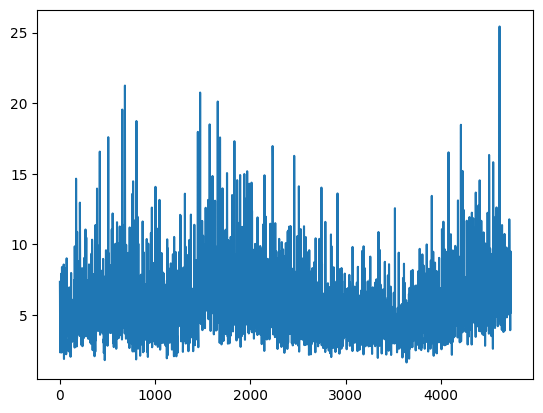

In [79]:
plt.plot(ser)

In [80]:
import pickle

with open('./data/magnetic_mag.pkl', 'wb') as f:
    pickle.dump(magnetic_mag, f)

In [ ]:
# import cdflib
# import numpy as np
# import pandas as pd

# path_base = 'C:/Users/User/Desktop/mag_data/spdf.gsfc.nasa.gov/pub/data/ace/mag/level_2_cdaweb/mfi_h2/'

# for date in date_list:
#     try:
#         try:
#             path = path_base + date.strftime('%Y') + '/ac_h2_mfi_' + date.strftime('%Y%m%d') + '_v05.cdf'
#             f = cdflib.CDF(path)
#             mag_mag = f.varget('Magnitude')
#             s = pd.Series(mag_mag, name='Magnitude')
#             magnetic_mag[date.strftime('%Y%m%d')] = s.mean()
#         except:
#             path = path_base + date.strftime('%Y') + '/ac_h2_mfi_' + date.strftime('%Y%m%d') + '_v06.cdf'
#             f = cdflib.CDF(path)
#             mag_mag = f.varget('Magnitude')
#             s = pd.Series(mag_mag, name='Magnitude')
#             magnetic_mag[date.strftime('%Y%m%d')] = s.mean()
#     except:
#         path = path_base + date.strftime('%Y') + '/ac_h2_mfi_' + date.strftime('%Y%m%d') + '_v07.cdf'
#         f = cdflib.CDF(path)
#         mag_mag = f.varget('Magnitude')
#         s = pd.Series(mag_mag, name='Magnitude')
#         magnetic_mag[date.strftime('%Y%m%d')] = s.mean()

In [5]:
import pickle
import pandas as pd

with open('./data/magnetic_mag.pkl', 'rb') as f:
    magnetic_mag = pickle.load(f)

df = pd.DataFrame({'Date':list(magnetic_mag.keys()), 'Magnitude':list(magnetic_mag.values())})
df

,Date,Magnitude
0,20100901,7.345958
1,20100902,6.303958
2,20100903,3.235500
3,20100904,2.347417
4,20100905,3.981583
...,...,...
4732,20230816,6.469583
4733,20230817,7.591792
4734,20230818,9.496291
4735,20230819,5.143250


In [9]:
import numpy as np
df[df['Magnitude']<-100] = np.nan

In [11]:
df['Magnitude'] = df['Magnitude'].interpolate()

In [6]:
with open('./data/mag.pkl', 'wb') as f:
    pickle.dump(df, f)